
# **Redes Neurais e Aprendizagem Profunda**
---


## Exemplo de Treinamento de Rede Neural

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
 
num_classes = 10
 
# input image dimensions
img_rows, img_cols = 28, 28
 
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
# convert class vectors to binary class matrices
y_train_copy = y_train
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


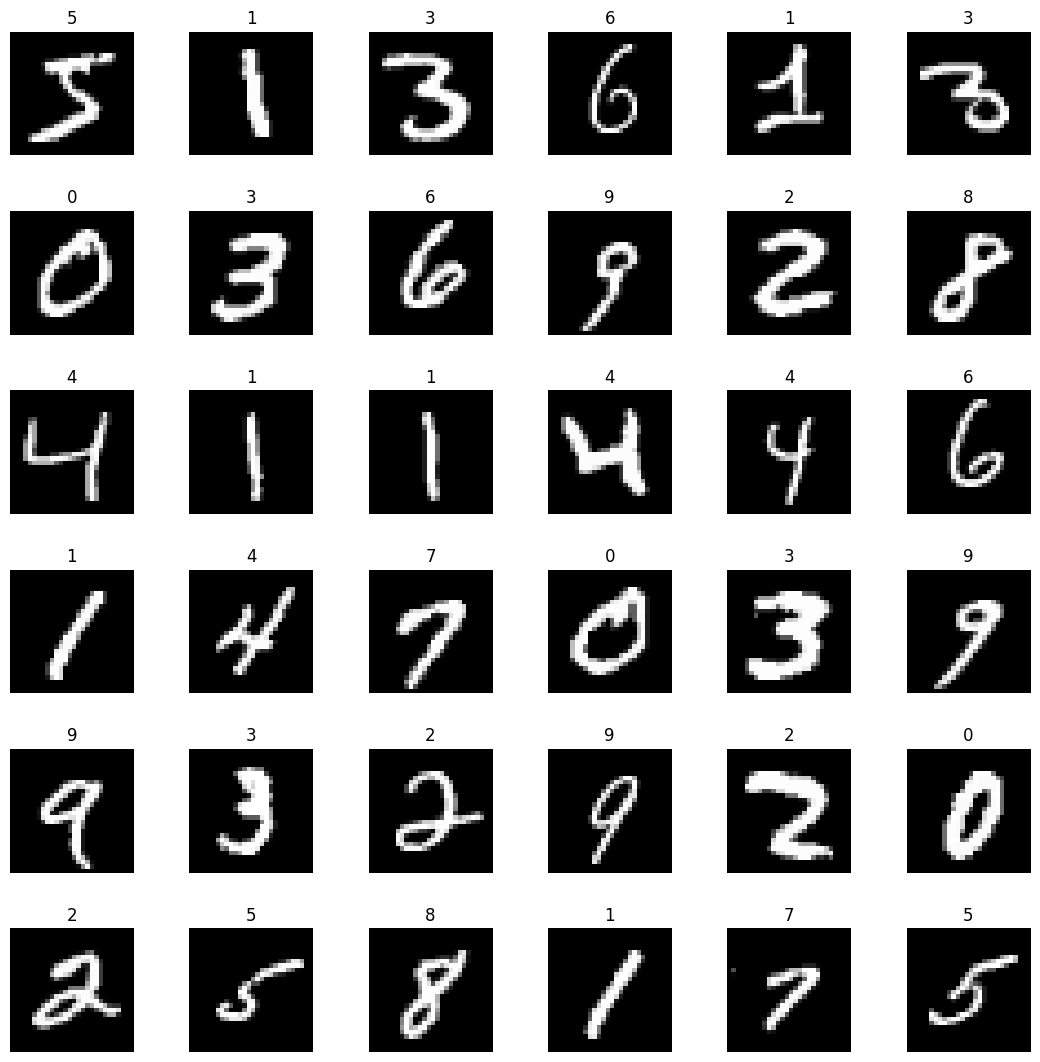

In [2]:
import matplotlib.pyplot as plt
 
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
#fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].axis('off')
    ax[x, y].set_title(y_train_copy[x + y * 6])

In [3]:
 
batch_size = 128
epochs = 12
 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adadelta',
              metrics=['accuracy'])
 
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
 
score = model.evaluate(x_test, y_test, verbose=0)
 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

c:\Users\mcoel\Documents\self_repos\Colab-AI-PucMinas\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 100ms/step - accuracy: 0.1193 - loss: 2.2969 - val_accuracy: 0.2854 - val_loss: 2.2680
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.2238 - loss: 2.2636 - val_accuracy: 0.4864 - val_loss: 2.2247
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.3371 - loss: 2.2216 - val_accuracy: 0.5671 - val_loss: 2.1646
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.4184 - loss: 2.1618 - val_accuracy: 0.6096 - val_loss: 2.0785
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.4727 - loss: 2.0756 - val_accuracy: 0.6388 - val_loss: 1.9580
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.5100 - loss: 1.9605 - val_accuracy: 0.6643 - val_loss: 1.7961
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.5483 - loss: 1.8063 - val_accuracy: 0.6963 - val_loss: 1.5969
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.5758 - loss: 1